In [1]:
250306

250306

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from concurrent.futures import ThreadPoolExecutor, wait

# Tarefa 3 - Neural Networks
Third assessed coursework for the course: Técnicas e Algoritmos em Ciência de Dados

This tarefa provides an exciting opportunity for students to put their knowledge acquired in class into practice, using neural networks to solve real-world problems in both classification and regression. Students will apply the concepts they have learned to build, train, and optimize neural networks, using a validation set to fine-tune hyperparameters. Students will also get used to generating important plots during training to analyse the models' behaviour. By the end of the project, students will have gained hands-on experience in implementing neural networks.

## General guidelines:

* This work must be entirely original. You are allowed to research documentation for specific libraries, but copying solutions from the internet or your classmates is strictly prohibited. Any such actions will result in a deduction of points for the coursework.
* Please enter your code in the designated areas of the notebook. You can create additional code cells to experiment with, but __make sure to place your final solutions where they are requested in the notebook.__
* Before submitting your work, make sure to rename the file to the random number that you created for the previous coursework (for example, 289479.ipynb).3

## Notebook Overview:

1. [Regression](#Regression) (50%)
2. [Classification](#Classification) (50%)

# Regression
## Dataset and Problem Description
In this exercise, you will use the Energy Efficiency Prediction dataset. This dataset contains information about the energy efficiency of buildings based on eight features, including the size of the building, the orientation, and the type of building materials used. The dataset includes two targets: heating load and cooling load, which represent the energy required to heat and cool the building, respectively.
This dataset is useful for building neural networks that predict the energy efficiency of buildings, which is an important problem in the field of sustainable energy. The dataset has been used in several machine learning research papers and provides a challenging regression problem.

## Exercise Description: Energy Efficiency Prediction with Neural Networks
In this exercise, you will use the Energy Efficiency Prediction dataset provided.
You will build and train a neural network to predict the heating load (column labelled y1 in the dataset) and the cooling load (column labelled y2) of a building based on its energy efficiency features. 

**To complete this exercise, you will write code to build and train neural networks for this problem:**

1. Split the dataset into training, validation, and test sets, using a 70:15:15 ratio.

2. Using numpy, build a neural network that takes in the energy efficiency features as input and predicts the heating load as output. You will choose the number of neurons per layers and the number of layers, **but each layer will have the same number of neurons**.

3. Code the forward pass and backpropagation algorithm to learn the weights of the neural network. Use the training set to train the neural network and update the weights using stochastic gradient descent. You will need to regularize your neural network using weight decay, that is, you will include a regularization term in your error function.

4. Monitor the training by plotting the training and validation losses across the epochs. 

The performance of your neural network will be different depending on the number of layers, number of neurons per layer and the value of λ that controls the amount of weight decay. You will experiment with 3 values of λ: 0 (no weight decay), 0.001 and 0.0001.
To choose the best network configuration and assess its performance you will:

1. Calculate the loss for each configuration on the validation set.

2. Choose one of the following:

    - Create 3 networks for each value of the λ regularization parameter. The first network with one hidden layer and 100 neurons, the second with two hidden layers and 250 neurons per layer, and the third with three hidden layers and 150 neurons per layer. At the end you should have 9 values of the loss in the validation set. 
    - The number of layers has to be an input argument to the function you’re coding (you should use an appropriate data structure to store the hidden layers). Generate 3 [heatmaps](https://seaborn.pydata.org/generated/seaborn.heatmap.html), one for each value of the λ regularization parameter, displaying the loss on the validation set by plotting the number of layers and number of neurons in a grid. This will help you visualise the best configuration for the neural network. For each heatmap you can choose all possible nine combinations between 1 to 3 hidden layers and 100, 150 and 250 neurons per layer, but you can also choose different values. **This option gives you 7.5 bonus points.**
__Note that for point a. you can have a variable $W_x$ for each hidden layer $x$, but for point b., in order to obtain the bonus points, you will have to have a variable number of layers and the weights $W_x$ have to be stored in an appropriate data structure of variable length according to the input argument.__

**Important:**
* Train for 50 epochs, remember that one epoch finishes when the whole training set was seen during training.
* Set the learning rate $\eta$ to $0.01$.

In [3]:
energy_dataset = pd.read_csv('data/energy_efficiency.csv')
energy_dataset

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085
...,...,...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0,0.320032,0.282790
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0,0.283904,0.161056
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0,0.281208,0.167250
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0,0.282286,0.153784


In [4]:
# Retrieving the dataset and the target
X = energy_dataset.drop(['Y1', 'Y2'], axis=1)
t = energy_dataset[['Y1', 'Y2']]

# Converting into numpy matrices
X = X.to_numpy()
t = t.to_numpy()

In [5]:
# Separating the dataset's subsets
X_train, X_split, t_train, t_split = train_test_split(X, t, train_size=.7)
X_validation, X_test, t_validation, t_test = train_test_split(X_split, t_split, train_size=.5)

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_validation = (X_validation - mean)/std
X_test = (X_test - mean)/std

In [6]:
def sigmoid(x: np.ndarray) -> np.ndarray:
    """Function that applies the sigmoid function into every entry of the passed array

    Args
    ----------
    x: np.ndarray
        Desired array

    Returns
    ----------
    np.ndarray:
        The array with the sigmoid function applicated
    """
    return 1/(1 + np.exp(-x))


def sigmoid_derivative(x: np.ndarray) -> np.ndarray:
    """Function that applies the sigmoid derivative function into every entry of the passed array

    Args
    ----------
    x: np.ndarray
        Desired array

    Returns
    ----------
    np.ndarray:
        The array with the sigmoid derivative function applicated
    """
    return sigmoid(x)*(1-sigmoid(x))

In [7]:
def root_mean_squared_error(y: np.ndarray, t: np.ndarray) -> float:
    """Function for calculating the RMSE

    Args:
        x (np.ndarray): Vector for making the RMSE

    Returns:
        float: RMSE
    """
    x = y - t
    return np.sqrt(np.sum(x**2)/len(x))


def sum_squared_errors(y: np.ndarray, t: np.ndarray) -> float:
    """Calculates the SUM OF SQUARED ERRORS between the two arrays passed

    Args
    ----------
        y: np.ndarray
            Prediction array
        t: np.ndarray
            Target array

    Returns
    ----------
        float:
        SSE
    """
    r = (y - t)**2
    return np.sum(r.sum(axis=0))

In [8]:
from typing import Callable

class NeuralNetwork:
    def __init__(
        self,
        layers_dimensions: list[int],
        activations: list[Callable[[np.ndarray], np.ndarray]],
        activations_derivatives: list[Callable[[np.ndarray], np.ndarray]],
        error_function: Callable[[np.ndarray, np.ndarray], float]
    ):
        """Initializes a NeuralNetwork that can be used for regressions and classifications depending on the
        `activation` functions passed. 
    
        Parameters
        ----------
        layers_dimensions: list[int]
            The list containing the amount of features per layer (Do not include the BIAS)
        activations : list[Callable[[np.ndarray], np.ndarray]]
            List containing the a            0,
                    np.sqrt(2 / (layers_dimensions[i] + layers_dimensions[i + 1])),
                    size=(layers_dimensions[i], layers_dimensions[i + 1])
                )ctivation functions used in the hidden layers, where the i-th function of
            the list is assigned to the i-th layer
        activations_derivatives: list[Callable[[np.ndarray], np.ndarray]]
            List containing the derivatives of each function passed in the `activations` argument. If
            `activations` has `n` entries, this argument must have `n-1` as we don't use the derivative
            of the last layer (output), for that, the target column must be adapted
        error_function: Callable[[np.ndarray, np.ndarray], float]
            The error function used to calculate the error history on the training method
        """
        
        self._activations = activations
        self._activations_derivatives = activations_derivatives
        self._layers_dimensions = layers_dimensions
        self._error_function = error_function

        # Initializing the weights
        self._weights, self._biases = self.restart_weights(
            self._layers_dimensions
        )

    def restart_weights(
        self,
        layers_dimensions: list[int]
    ) -> tuple[list[np.ndarray], list[np.ndarray]]:
        """Restart the weights of the Neural Network
    
        Parameters
        ----------
        layers_dimensions: list[int]
            The list containing the amount of features per layer (Do not include the BIAS)
        
        Returns
        ----------
        list[int]:
            List with the weights matrices restarted
        """

        w_list = []
        biases_list = []
        
        for i in range(len(layers_dimensions)-1):
            w_list.append(
                np.random.normal(
                    0,
                    0.01,
                    size=(layers_dimensions[i], layers_dimensions[i + 1]),
                )
            )
            biases_list.append(np.random.normal(loc=0, scale=0.01, size=(1, layers_dimensions[i+1])))
        
        return w_list, biases_list

    def predict(self,
        X: np.ndarray,
        func_result: Callable[[np.ndarray], None] = None,
        func_weighted_sum: Callable[[np.ndarray], None] = None
    ) -> np.ndarray:
        """Function that predicts a given X according to the weights stored at the moment

        Args
        ----------
        X: np.ndarray
            Data that will be predicted
        func_result (optional): Callable[[np.ndarray], None]
            This parameters receives a function that will be executed every end of loop
            and pass the activation result as an argument
        func_weighted_sum (optional): Callable[[np.ndarray], None]
            This parameters receives a function that will be executed every end of loop
            and pass the weighted sum before activation as an argument

        Returns:
            np.ndarray: The prediction based on the actual weights
        """

        result = X.copy()  # Creating a copy of X so we won't change any of its original values
        for j in range(len(self._activations)):  # For each j from 0 to n-1
            weighted_sum = result @ self._weights[j] + self._biases[j]
            result = self._activations[j](weighted_sum)
            # We multiply it by the corresponding weight matrix and pass it to the activation function
            # from the j-th layer

            if j < len(self._activations)-1:
                if func_result:
                    func_result(result)
                if func_weighted_sum:
                    func_weighted_sum(weighted_sum)
        
        return result

    def train(self,
        X: np.ndarray,
        t: np.ndarray,
        learning_rate: float,
        epochs: int,
        lambd: float = 0
    ) -> list[float]:
        """This function trains the weights based on the data passed and the target given

        Args
        ----------
        X: np.ndarray
            The data that will be used for training
        t: np.ndarray
            The vector with the correct values for each prediction
        learning_rate: float
            How much the gradient will move to learn the weights
        epochs: int
            How many epochs will it take for the training to end
        lambd: float
            Regularization term
        
        Returns
        ----------
        list[float]:
            A list containing the error for each epoch
        """

        error_history = []  # Initializing the error history
        layers = len(self._weights)-1

        for _ in range(epochs):  # Going through each epoch
            idx = np.random.permutation(len(X))
            X_copy=X[idx]
            t_copy=t[idx]

            for n, x_n in enumerate(X_copy):  # Going through each x_n
                z_n = []  # List containing the activations for each layer of the passed x_n
                a_n = []  # List containing the weighted sum before activation of each layer

                x_n = x_n.reshape(1, -1)
                t_n = t_copy[n, :].reshape(1, -1)

                # Forward Pass
                y_n = self.predict(x_n, z_n.append, a_n.append)

                # Backpropagation
                deltas = []
                deltas.append(y_n - t_n)

                # Calculating the deltas
                for p in reversed(range(layers)):
                    # For each layer of my Neural Network going from the end to the start
                    # that means, if I have P layers, I'll start from P-1 to 0 (Index form)
                    delta_p = \
                    self._activations_derivatives[p](a_n[p]) * (deltas[-1] @ self._weights[p+1].T)
                    deltas.append(delta_p)

                deltas = deltas[::-1]

                for p in range(layers):
                    if p == 0:
                        dW = x_n.T @ deltas[p] + lambd * self._weights[p]
                    else:
                        dW = z_n[p].T @ deltas[p] + lambd * self._weights[p]
                    self._weights[p] -= learning_rate*dW
                    self._biases[p] -= learning_rate*deltas[p]

            epoch_prediction = self.predict(X_copy)  # Predicting with the new weights
            error_epoch = self._error_function(epoch_prediction, t_copy)  # Getting the error for this epoch
            error_history.append(error_epoch)  # Adding the error
    
        return error_history

In [9]:
lr = 0.01
epochs = 50
regularizators = [0, 0.001, 0.0001]
neurons = [100, 150, 250]

results_model_error = [np.zeros(shape=(3, 3)) for _ in range(3)]
results_sse_error = [np.zeros(shape=(3, 3)) for _ in range(3)]

def calculate_best_hyperparameters(lambd_index, neuron_index, layer):
    model = NeuralNetwork(
        layers_dimensions=[ X_train.shape[1], *(neurons[neuron_index] for _ in range(layer+1)), 2 ],
        activations=[ *(sigmoid for _ in range(layer+1)), lambda x: x ],
        activations_derivatives=[ *(sigmoid_derivative for _ in range(layer+1)) ],
        error_function=root_mean_squared_error
    )

    model.train(X_train, t_train, lr, epochs, regularizators[lambd_index])
    
    y_validation = model.predict(X_validation)
    error_function = model._error_function(y_validation, t_validation)
    sse = sum_squared_errors(y_validation, t_validation)
    
    return {
        "lambda_index": lambd_index,
        "layer": layer,
        "neuron_index": neuron_index,
        "model_error": error_function,
        "sse": sse,
    }


threads_results = []

with ThreadPoolExecutor() as executor:
    futures = []

    for j in range(len(regularizators)):
        for i in range(len(neurons)):
            for layer in range(3): 
                futures.append(executor.submit(calculate_best_hyperparameters, j, i, layer))

    wait(futures)

    for future in futures:
        threads_results.append(future.result())

In [10]:
for result in threads_results:
    results_model_error[result['lambda_index']][result['layer'], result['neuron_index']] = result['model_error']
    results_sse_error[result['lambda_index']][result['layer'], result['neuron_index']] = result['sse']

# Preparing the data for the heatmaps

plot_dfs_model_error = []
plot_dfs_sse = []

for result in results_model_error:
    plot_dfs_model_error.append(
        pd.DataFrame({
            100: result[:, 0],
            150: result[:, 1],
            250: result[:, 2]
        }, index=[1, 2, 3])
    )
for result in results_sse_error:
    plot_dfs_sse.append(
        pd.DataFrame({
            100: result[:, 0],
            150: result[:, 1],
            250: result[:, 2]
        }, index=[1, 2, 3])
    )

RMSE Heatmap


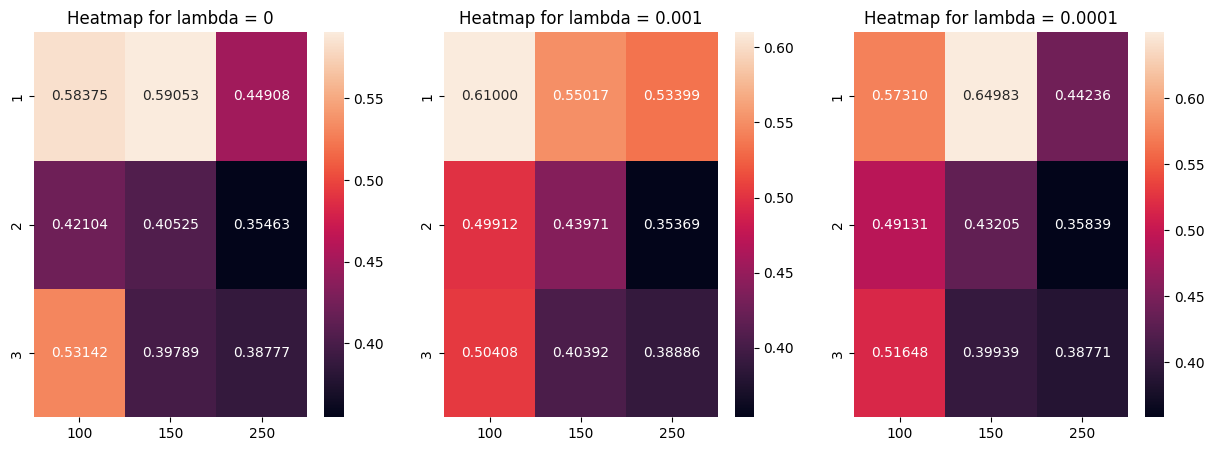

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

print("RMSE Heatmap")

for i, df in enumerate(plot_dfs_model_error):
    axes[i].set_title(f"Heatmap for lambda = {regularizators[i]}")

    sns.heatmap(df, ax=axes[i], annot=True, fmt=".5f")

plt.show()

SSE Heatmap


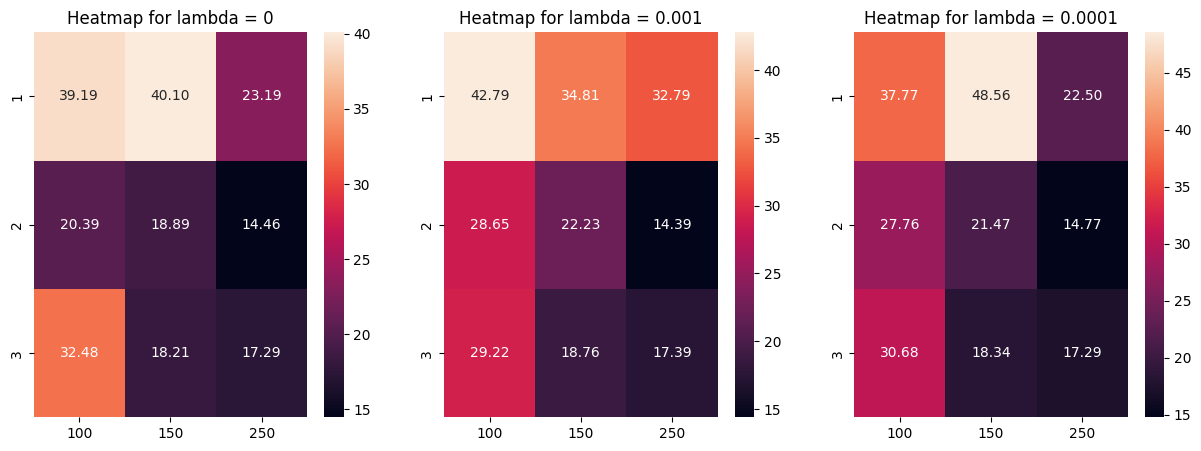

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

print("SSE Heatmap")

for i, df in enumerate(plot_dfs_sse):
    axes[i].set_title(f"Heatmap for lambda = {regularizators[i]}")

    sns.heatmap(df, ax=axes[i], annot=True, fmt=".2f")

plt.show()

In [13]:
# Getting the best parameters
best_info_by_rmse = min(threads_results, key=lambda result: result['model_error'])

neuron = neurons[best_info_by_rmse['neuron_index']]
layer = best_info_by_rmse['layer']+1
lambd = regularizators[best_info_by_rmse['lambda_index']]

model = NeuralNetwork(
    layers_dimensions=[ X_train.shape[1], *(neuron for _ in range(layer+1)), 2 ],
    activations=[ *(sigmoid for _ in range(layer+1)), lambda x: x ],
    activations_derivatives=[ *(sigmoid_derivative for _ in range(layer+1)) ],
    error_function=root_mean_squared_error
)

err_history = model.train(np.r_[X_train, X_validation], np.r_[t_train, t_validation], lr, 50, lambd)

RMSE for the TEST set: 0.37145067565409745


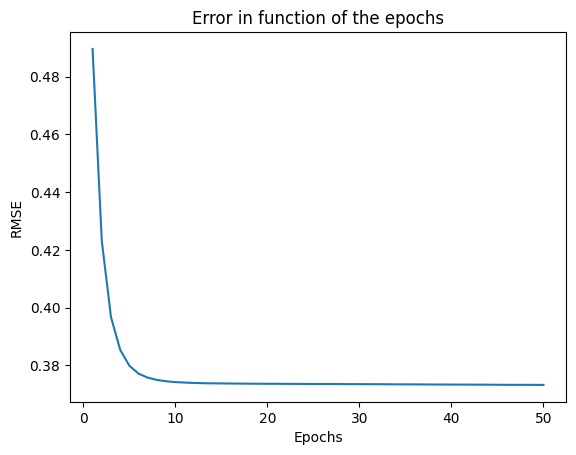

In [14]:
plt.title("Error in function of the epochs")
plt.xlabel("Epochs")
plt.ylabel("RMSE")

plt.plot([x+1 for x in range(len(err_history))], err_history)

y_test = model.predict(X_test)

print(f"RMSE for the TEST set: {root_mean_squared_error(y_test, t_test)}")

plt.show()

# Classification
## Dataset description: 
This is a dataset from the medical domain. It describes the problem of diagnosing coronary heart disease (CHD) via Traditional Chinese Medicine approaches. Each datapoint corresponds to a patient represented by a set of 49 features corresponding to the presence or absence of different symptoms: feelings cold or warm, sweating, etc. The 6 labels represent presence or absence of specific heart conditions: deficiency of heart qi syndrome, deficiency of heart yang syndrome, deficiency of heart yin syndrome, qi stagnation syndrome, turbid phlegm syndrome, and blood stasis syndrome.

## Exercise Description: CHD49 Multi-Label Classification with Neural Networks
In this exercise, you will build and train a neural network to predict the 6 different labels of CHD (last 6 columns of the dataset). 

**To complete this exercise, follow these steps:**

1. Load the dataset and split it into training, validation, and test sets, using a 70:15:15 ratio. 

2. Build a neural network using numpy that takes in the features as input and predicts the 6 different labels. You will choose the number of neurons per layers and the number of layers, but each layer will have the same number of neurons.

3. Code the forward pass and backpropagation algorithm to learn the weights of the neural network. Use the training set to train the neural network and update the weights using batch gradient descent. You will choose the number of neurons per layers and the number of layers, but each layer will have the same number of neurons.

4. Monitor the training by plotting the training and validation losses across the epochs. 

The performance of your neural network will be different depending on the number of layers, number of neurons per layer and the value of λ that controls the amount of weight decay. You will experiment with 3 values of λ: 0 (no weight decay), 0.1 and 0.01.
To choose the best network configuration and assess its performance you will:

1. Calculate the loss for each configuration on the validation set.

2. Choose one of the following:

    - Create 3 networks for each value of the λ regularization parameter. The first network with one hidden layer and 100 neurons, the second with two hidden layers and 250 neurons per layer, and the third with three hidden layers and 150 neurons per layer. At the end you should have 9 values of the loss in the validation set. 
    - The number of layers has to be an input argument to the function you’re coding (you should use an appropriate data structure to store the hidden layers). Generate 3 heatmaps, one for each value of the λ regularization parameter, displaying the loss on the validation set by plotting the number of layers and number of neurons in a grid. This will help you visualise the best configuration for the neural network. For each heatmap you can choose all possible nine combinations between 1 to 3 hidden layers and 100, 150 and 250 neurons per layer, but you can also choose different values. **This option gives you 7.5 bonus points.**
__Note that for point a. you can have a variable $W_x$ for each hidden layer $x$, but for point b., in order to obtain the bonus points, you will have to have a variable number of layers and the weights $W_x$ have to be stored in an appropriate data structure of variable length according to the input argument.__


**Important:**
* Train for at least 1000 epochs, remember that one epoch finishes when the whole training set was seen during training.
* Set the learning rate $\eta$ to $0.01$.


In [15]:
chd = pd.read_csv('data/CHD_49.csv')
chd

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att46,att47,att48,att49,label1,label2,label3,label4,label5,label6
0,1.0,-1.0,1.0,-1.0,1.0,1.0,0.0,-0.5,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
1,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,1.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,-1.0,1.0,-1.0,1.0,0.0,-0.5,1.0,1.0,...,-1.0,1.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-1.0,-1.0,-1.0,1.0,1.0,1.0,0.0,-0.5,-1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,1.0,-1.0,-1.0,-1.0,1.0,-1.0,0.0,0.0,1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0,0.0,0.0,1.0
551,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0,0.0,0.0,1.0
552,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
553,1.0,1.0,-1.0,-1.0,1.0,1.0,0.0,0.5,1.0,1.0,...,-1.0,1.0,-1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [16]:
# Retrieving the dataset and the target
X = chd.drop([f'label{i+1}' for i in range(6)], axis=1)
t = chd[[f'label{i+1}' for i in range(6)]]

# Converting into numpy matrices
X = X.to_numpy()
t = t.to_numpy()

In [17]:
# Separating the dataset's subsets
X_train, X_split, t_train, t_split = train_test_split(X, t, train_size=.7)
X_validation, X_test, t_validation, t_test = train_test_split(X_split, t_split, train_size=.5)

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_validation = (X_validation - mean)/std
X_test = (X_test - mean)/std

In [18]:
def cross_entropy(y: np.ndarray, t: np.ndarray) -> np.ndarray:
    """Function that calculates the cross entropy function between y and t

    Args
    ----------
    y: np.ndarray
        First vector
    t: np.ndarray
        Second vector

    Returns
    ----------
    np.ndarray:
        The cross entropy between y and t
    """
    return -(t * np.log(y+1e-12) + (1 - t)*np.log(1-y+1e-12)).sum()

In [55]:
from typing import Callable

class NeuralNetwork:
    def __init__(
        self,
        layers_dimensions: list[int],
        activations: list[Callable[[np.ndarray], np.ndarray]],
        activations_derivatives: list[Callable[[np.ndarray], np.ndarray]],
        error_function: Callable[[np.ndarray, np.ndarray], float]
    ):
        """Initializes a NeuralNetwork that can be used for regressions and classifications depending on the
        `activation` functions passed. 
    
        Parameters
        ----------
        layers_dimensions: list[int]
            The list containing the amount of features per layer (Do not include the BIAS)
        activations : list[Callable[[np.ndarray], np.ndarray]]
            List containing the a            0,
                    np.sqrt(2 / (layers_dimensions[i] + layers_dimensions[i + 1])),
                    size=(layers_dimensions[i], layers_dimensions[i + 1])
                )ctivation functions used in the hidden layers, where the i-th function of
            the list is assigned to the i-th layer
        activations_derivatives: list[Callable[[np.ndarray], np.ndarray]]
            List containing the derivatives of each function passed in the `activations` argument. If
            `activations` has `n` entries, this argument must have `n-1` as we don't use the derivative
            of the last layer (output), for that, the target column must be adapted
        error_function: Callable[[np.ndarray, np.ndarray], float]
            The error function used to calculate the error history on the training method
        """
        
        self._activations = activations
        self._activations_derivatives = activations_derivatives
        self._layers_dimensions = layers_dimensions
        self._error_function = error_function

        # Initializing the weights
        self._weights, self._biases = self.restart_weights(
            self._layers_dimensions
        )

    def restart_weights(
        self,
        layers_dimensions: list[int]
    ) -> tuple[list[np.ndarray], list[np.ndarray]]:
        """Restart the weights of the Neural Network
    
        Parameters
        ----------
        layers_dimensions: list[int]
            The list containing the amount of features per layer (Do not include the BIAS)
        
        Returns
        ----------
        list[int]:
            List with the weights matrices restarted
        """

        w_list = []
        biases_list = []
        
        for i in range(len(layers_dimensions)-1):
            w_list.append(
                np.random.normal(
                    0,
                    0.01,
                    size=(layers_dimensions[i], layers_dimensions[i + 1]),
                )
            )
            biases_list.append(np.random.normal(loc=0, scale=0.01, size=(1, layers_dimensions[i+1])))
        
        return w_list, biases_list

    def predict(self,
        X: np.ndarray,
        func_result: Callable[[np.ndarray], None] = None,
        func_weighted_sum: Callable[[np.ndarray], None] = None
    ) -> np.ndarray:
        """Function that predicts a given X according to the weights stored at the moment

        Args
        ----------
        X: np.ndarray
            Data that will be predicted
        func_result (optional): Callable[[np.ndarray], None]
            This parameters receives a function that will be executed every end of loop
            and pass the activation result as an argument
        func_weighted_sum (optional): Callable[[np.ndarray], None]
            This parameters receives a function that will be executed every end of loop
            and pass the weighted sum before activation as an argument

        Returns:
            np.ndarray: The prediction based on the actual weights
        """

        result = X.copy()  # Creating a copy of X so we won't change any of its original values
        for j in range(len(self._activations)):  # For each j from 0 to n-1
            weighted_sum = result @ self._weights[j] + self._biases[j]
            result = self._activations[j](weighted_sum)
            # We multiply it by the corresponding weight matrix and pass it to the activation function
            # from the j-th layer

            if func_result:
                func_result(result)
            if func_weighted_sum:
                func_weighted_sum(weighted_sum)
        
        return result

    def train(self,
        X: np.ndarray,
        t: np.ndarray,
        learning_rate: float,
        epochs: int,
        lambd: float = 0
    ) -> list[float]:
        """This function trains the weights based on the data passed and the target given

        Args
        ----------
        X: np.ndarray
            The data that will be used for training
        t: np.ndarray
            The vector with the correct values for each prediction
        learning_rate: float
            How much the gradient will move to learn the weights
        epochs: int
            How many epochs will it take for the training to end
        lambd: float
            Regularization term
        
        Returns
        ----------
        list[float]:
            A list containing the error for each epoch
        """

        error_history = []  # Initializing the error history
        layers = len(self._weights)

        for _ in range(epochs):  # Going through each epoch
            idx = np.random.permutation(len(X))
            X_copy=X[idx]
            t_copy=t[idx]

            Zs = [X_copy]  # List containing the Z's for each exit
            As = []

            y = self.predict(X_copy, Zs.append, As.append)

            deltas = []

            for p in reversed(range(layers)):
                if p == layers-1:
                    deltas.insert( 0, y - t_copy )
                else:
                    delta_p = self._activations_derivatives[p](As[p]) * (deltas[0] @ self._weights[p+1].T)
                    deltas.insert(0, delta_p)

            for k in range(len(deltas)):
                dW_k = Zs[k].T @ deltas[k] / len(X_copy) + lambd * self._weights[k]
                self._weights[k] -= learning_rate*dW_k
                db_k = np.mean(deltas[k], axis=0, keepdims=True)
                self._biases[k] -= learning_rate * db_k
            
            epoch_prediction = self.predict(X_copy)  # Predicting with the new weights
            error_epoch = self._error_function(epoch_prediction, t_copy)  # Getting the error for this epoch
            regularization_term = 1/2 * lambd * (sum(np.sum(W) for W in self._weights))
            error_history.append(error_epoch + regularization_term)  # Adding the error
        
        return error_history

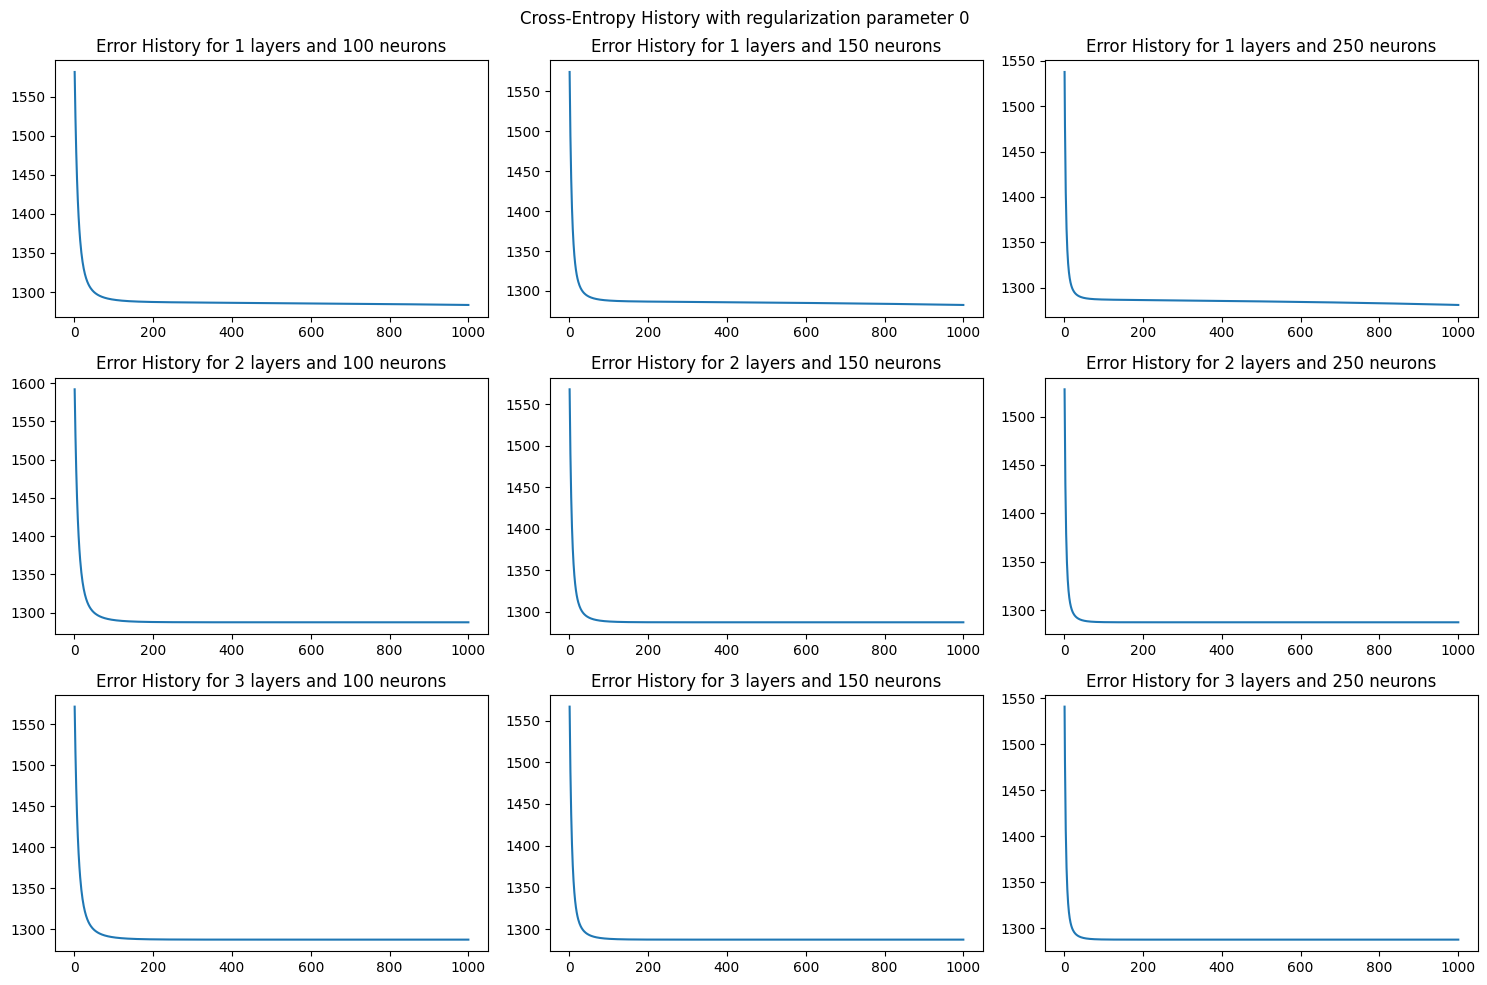

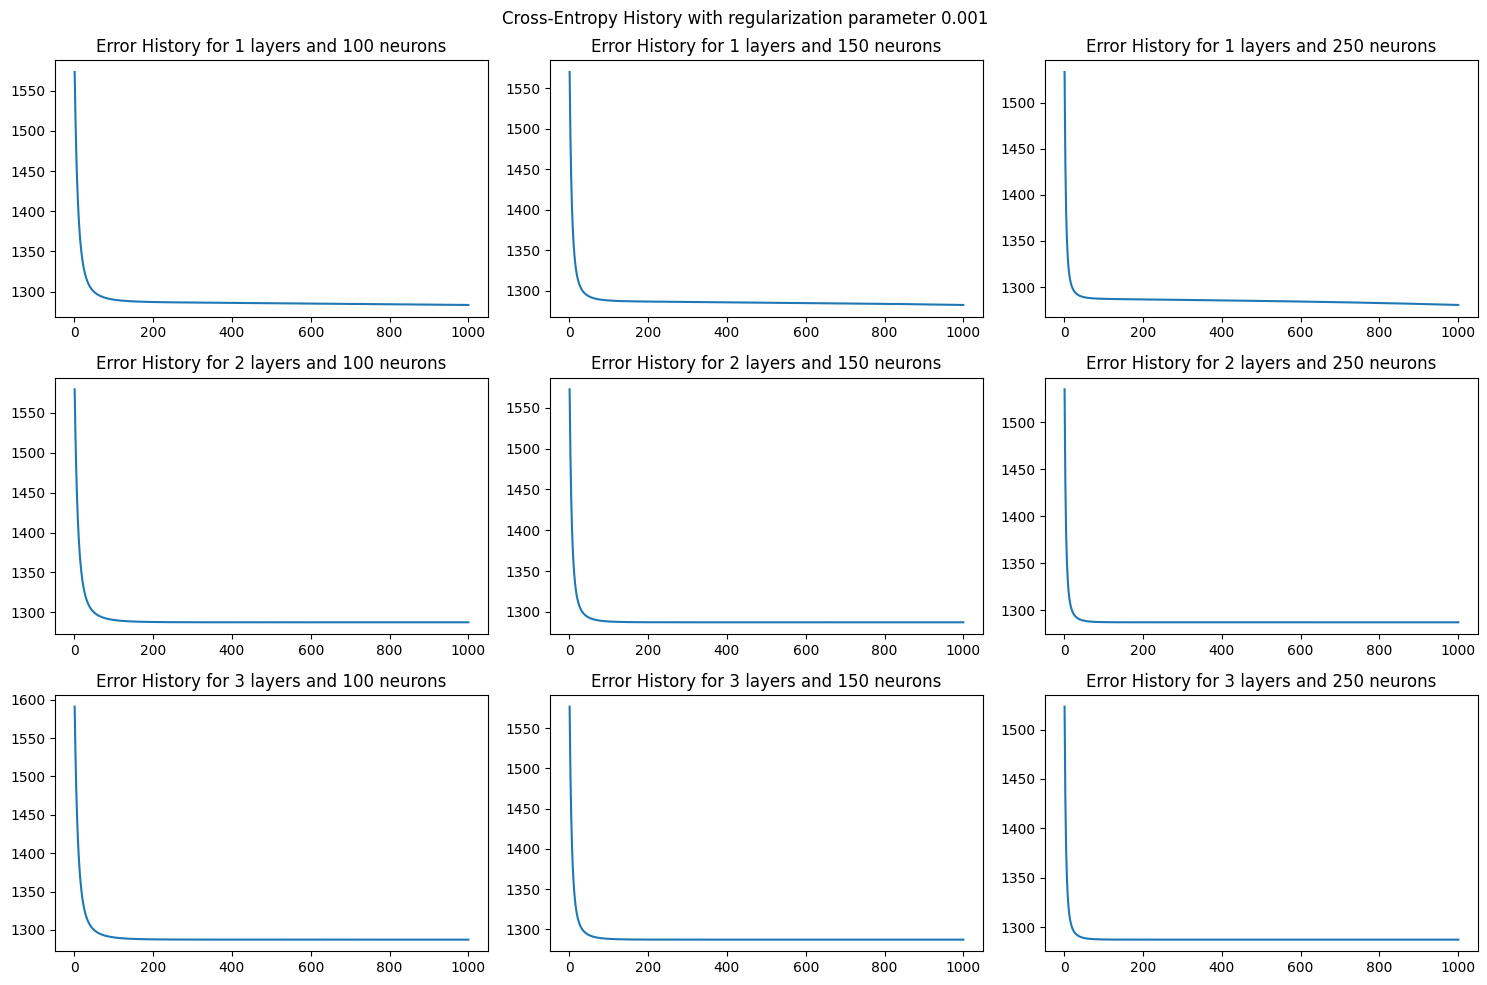

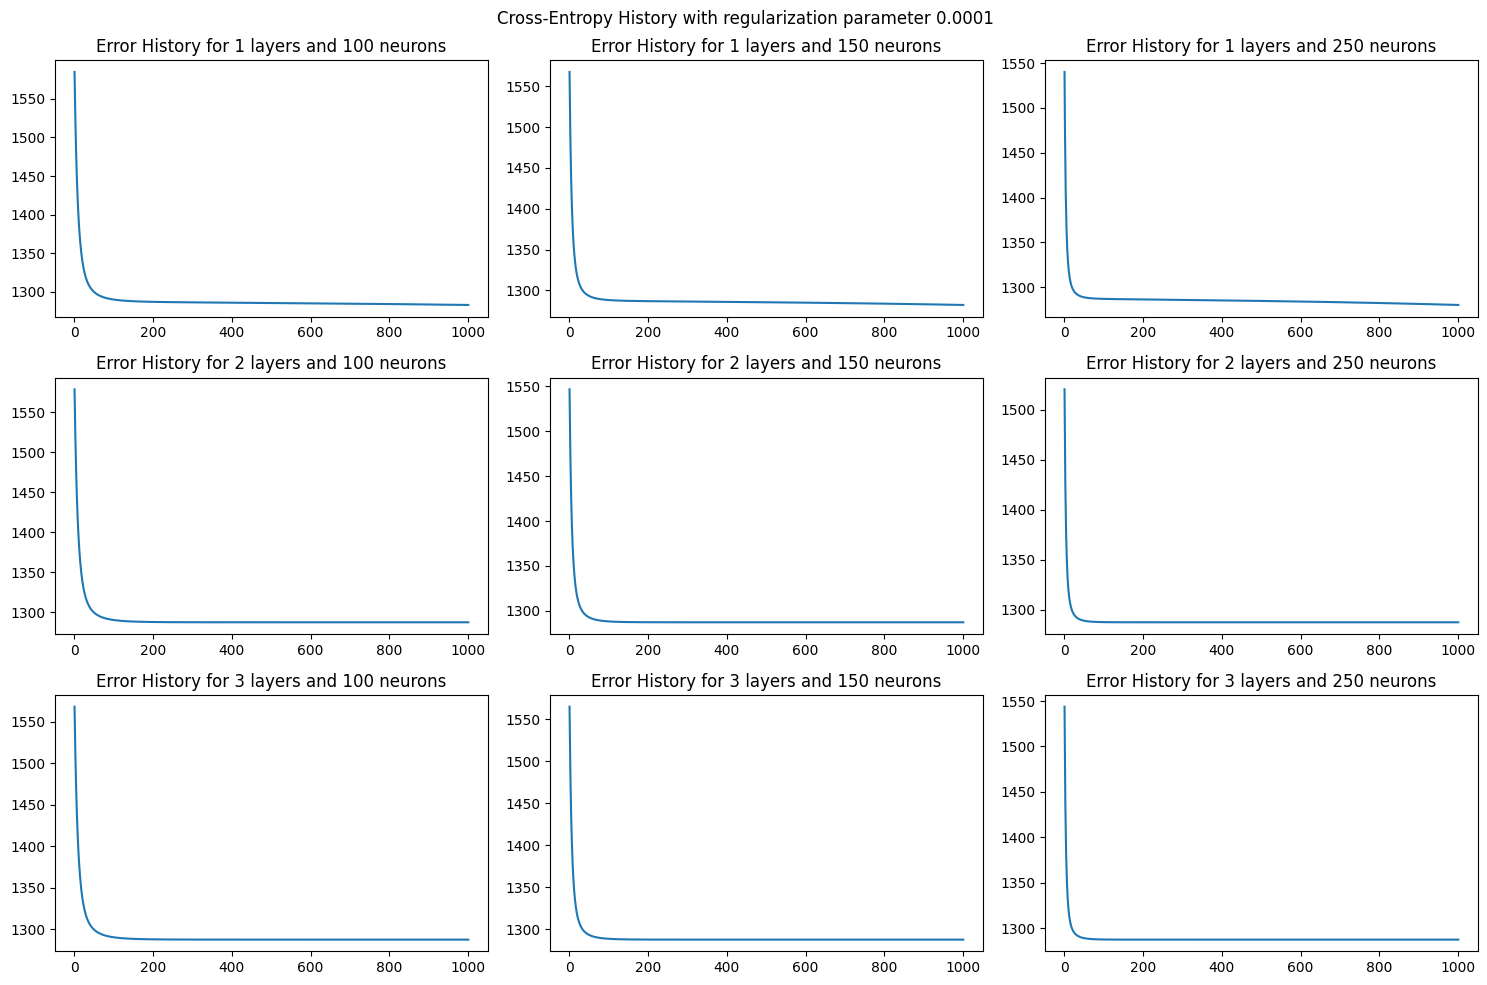

In [20]:
lr = 0.01
epochs = 1000
regularizators = [0, 0.001, 0.0001]
neurons = [100, 150, 250]

# Plotting the training set's error history for each parameter

results_model_error = [np.zeros(shape=(3, 3)) for _ in range(3)]

for j in range(len(regularizators)):
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    fig.suptitle(f"Cross-Entropy History with regularization parameter {regularizators[j]}")
    for i in range(len(neurons)):
        for layer in range(3): 
            model = NeuralNetwork(
                layers_dimensions=[ X_train.shape[1], *(neurons[i] for _ in range(layer+1)), 6 ],
                activations=[ *(sigmoid for _ in range(layer+1)), sigmoid ],
                activations_derivatives=[ sigmoid_derivative for _ in range(layer+1) ],
                error_function=cross_entropy
            )

            err_history = model.train(X_train, t_train, lr, epochs, regularizators[j])

            y_validation = model.predict(X_validation)

            error = model._error_function(y_validation, t_validation)
            results_model_error[j][layer, i] = error

            axes[layer][i].set_title(f"Error History for {layer+1} layers and {neurons[i]} neurons")
            axes[layer][i].plot([i+1 for i in range(epochs)], err_history)
    plt.tight_layout()
    plt.show()

In [21]:
# Preparing the data for the heatmaps
plot_dfs_model_error = []
plot_dfs_sse = []

for result in results_model_error:
    plot_dfs_model_error.append(
        pd.DataFrame({
            100: result[:, 0],
            150: result[:, 1],
            250: result[:, 2]
        }, index=[1, 2, 3])
    )

Cross Entropy Heatmap


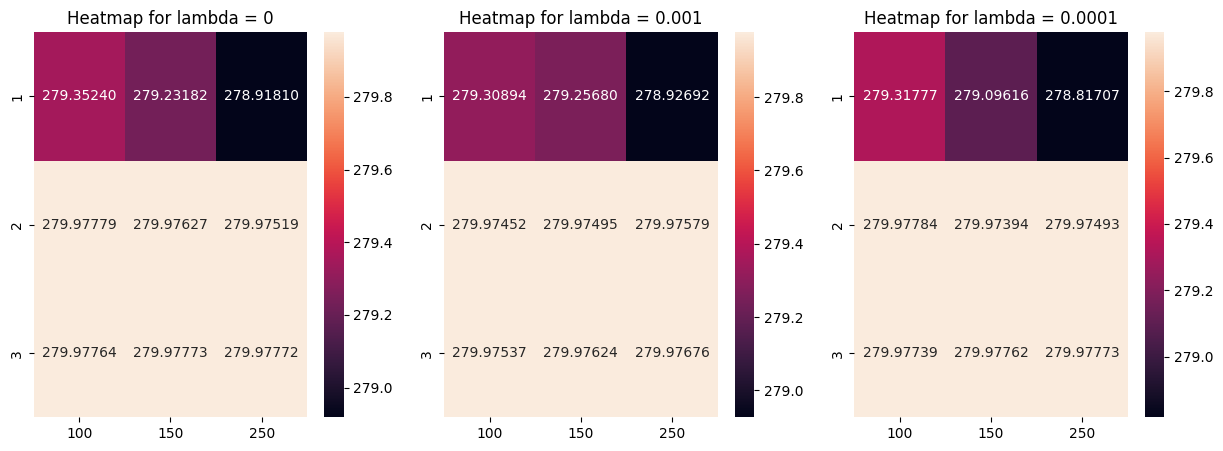

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

print("Cross Entropy Heatmap")

for i, df in enumerate(plot_dfs_model_error):
    axes[i].set_title(f"Heatmap for lambda = {regularizators[i]}")

    sns.heatmap(df, ax=axes[i], annot=True, fmt=".5f")

plt.show()

In [56]:
minimums = []
for i, result in enumerate(results_model_error):
    index_row_min, index_col_min = np.unravel_index(result.argmin(), result.shape)
    minimums.append((index_row_min, index_col_min, i, result[index_row_min, index_col_min]))

best_parameters = min(minimums, key=lambda m: m[3])

qtd_neurons = neurons[best_parameters[1]]
regularizator = regularizators[best_parameters[2]]
layers = best_parameters[0]+1

model = NeuralNetwork(
    layers_dimensions=[ X_train.shape[1], *(qtd_neurons for _ in range(layers)), 6 ],
    activations=[ *(sigmoid for _ in range(layers)), sigmoid ],
    activations_derivatives=[ sigmoid_derivative for _ in range(layers) ],
    error_function=cross_entropy
)

err_history = model.train(np.r_[X_train, X_validation], np.r_[t_train, t_validation], 0.01, 1000, regularizator)

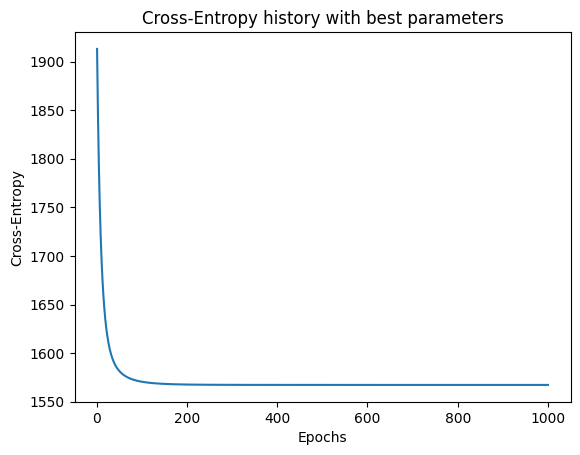

In [91]:
plt.title("Cross-Entropy history with best parameters")
plt.plot([i+1 for i in range(len(err_history))], err_history)
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.show()

In [92]:
y_test = model.predict(X_test)

roc_auc_score(t_test, y_test)

np.float64(0.5004841280170443)

In [97]:
def get_measures(predicted_values: np.ndarray, true_labels: np.ndarray, threshold: float):
    # If we are going to use only the second column, I'm going to get all the values of the second column
    data_dataframe = pd.DataFrame()  # Creating a dataframe to make easier calculations and operations

    # Creating the dataframe's columns
    data_dataframe['being_one_percentage'] = predicted_values
    data_dataframe['true_labels'] = true_labels

    # Calculating the results based on the threshold
    data_dataframe['result_by_threshold'] = data_dataframe['being_one_percentage'] >= threshold

    # Getting the informations to calculate TPR & FPR
    true_positives = len(data_dataframe[
        (data_dataframe['result_by_threshold'] == True) & (data_dataframe['true_labels'] == True)
    ])
    false_negatives = len(data_dataframe[
        (data_dataframe['result_by_threshold'] == False) & (data_dataframe['true_labels'] == True)
    ])
    true_negatives = len(data_dataframe[
        (data_dataframe['result_by_threshold'] == False) & (data_dataframe['true_labels'] == False)
    ])
    false_positives = len(data_dataframe[
        (data_dataframe['result_by_threshold'] == True) & (data_dataframe['true_labels'] == False)
    ])

    return {
        'TP': true_positives,
        'FN': false_negatives,
        'TN': true_negatives,
        'FP': false_positives
    }


def measures(t: np.ndarray, y: np.ndarray) -> tuple[np.ndarray]:
    """Function that calculates the precision and F1-score for each feature of the predictions
    passed as arguments. i.e, if you pass a prediction of 5 classes, it will return the precision
    and f1-score for each class

    Args:
        t (np.ndarray): True labels (n datapoints with m output features)
        y (np.ndarray): Predicted labels (n datapoints with m output features)

    Returns:
        tuple[float]: Ca
    """
    precisions = []
    recalls = []
    f1_scores = []
    threadsholds = []

    for feature in range(t.shape[1]):
        t_feature = t[:, feature]
        y_feature = y[:, feature]

        precisions_feature = []
        recalls_feature = []
        f1_scores_feature = []

        threadshold_feature = np.unique(y_feature)

        for tau in threadshold_feature:
            infos = get_measures(y_feature, t_feature, tau)

            precision = infos['TP'] / (infos['TP'] + infos['FP']) if infos['TP'] + infos['FP'] != 0 else 0
            recall = infos['TP'] / (infos['TP'] + infos['FN']) if infos['TP'] + infos['FN'] != 0 else 0
            f1_score = 2*(precision*recall)/(precision+recall) if precision + recall != 0 else 0

            precisions_feature.append(precision)
            f1_scores_feature.append(f1_score)
            recalls_feature.append(recall)
        
        precisions.append(precisions_feature)
        f1_scores.append(f1_scores_feature)
        threadsholds.append(threadshold_feature)
        recalls.append(recalls_feature)

    return precisions, f1_scores, threadsholds, recalls

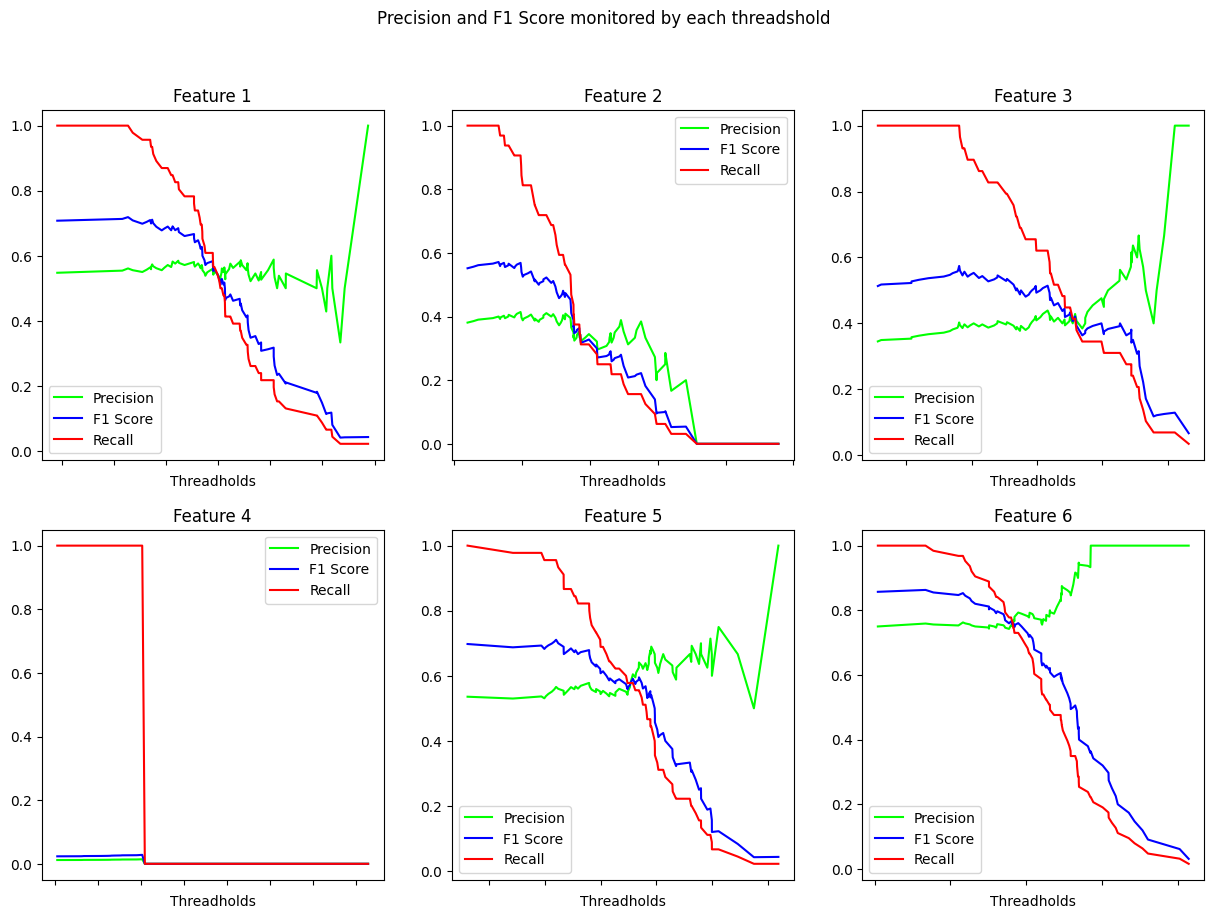

In [98]:
precisions, f1_scores, threadsholds, recalls = measures(t_test, y_test)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

fig.suptitle("Precision and F1 Score monitored by each threadshold")

for i in range(2):
    for j in range(3):
        axes[i][j].set_xlabel("Threadholds")

        axes[i][j].plot(threadsholds[3*i+j], precisions[3*i+j], label="Precision", color='lime')
        axes[i][j].plot(threadsholds[3*i+j], f1_scores[3*i+j], label="F1 Score", color='blue')
        axes[i][j].plot(threadsholds[3*i+j], recalls[3*i+j], label="Recall", color='red')

        axes[i][j].set_title(f"Feature {3*i+j+1}")

        axes[i][j].set_xticklabels([])

        axes[i][j].legend()

plt.show()

In [102]:
# As we can see, this dataset is really difficult to get a good prediction, but in the general, we can get
# an avarage good precision for each feature's prediction

# Getting the bests threadsholds
best_threadsholds_per_feature = []

for j, f1_feature in enumerate(f1_scores):
    idx_better_f1 = f1_feature.index(max(f1_feature))
    best_threadsholds_per_feature.append(threadsholds[j][idx_better_f1])

In [108]:
# Now that we have all our best threadsholds, let's predict the test again
y_test = model.predict(X_test)

y_test = np.where(y_test >= best_threadsholds_per_feature, 1, 0)

for feature in range(y_test.shape[1]):
    infos = get_measures(y_test[:, feature], t_test[:, feature], best_threadsholds_per_feature[feature])
    
    precision = infos['TP'] / (infos['TP'] + infos['FP']) if infos['TP'] + infos['FP'] != 0 else 0
    recall = infos['TP'] / (infos['TP'] + infos['FN']) if infos['TP'] + infos['FN'] != 0 else 0
    f1_score = 2*(precision*recall)/(precision+recall) if precision + recall != 0 else 0

    print(f"Feature {feature+1}")
    print(precision)
    print(recall)
    print(f1_score)
    print("="*20)

Feature 1
0.5609756097560976
1.0
0.71875
Feature 2
0.4
1.0
0.5714285714285715
Feature 3
0.4027777777777778
1.0
0.5742574257425743
Feature 4
0.014285714285714285
1.0
0.028169014084507043
Feature 5
0.5657894736842105
0.9555555555555556
0.7107438016528925
Feature 6
0.7590361445783133
1.0
0.8630136986301369


In [ ]:
# As we can see, with the neurons, layers and regularizators used, we can't predict the diseases really good, we
# would need to try with more and check the results (The results aren't the best, but they are precise enough
# to help doctors to see the proabilities of being certain diseases)